In [ ]:
pip install wildlife_tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not

In [ ]:
import os
import sys
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.datasets import WhaleSharkID, SeaTurtleID2022
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit
import timm
import pandas as pd
import torchvision.transforms as T
import numpy as np

from wildlife_tools.data import WildlifeDataset, SplitMetadata
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

ModuleNotFoundError: No module named 'wildlife_datasets'

In [ ]:
from wildlife_datasets import analysis, datasets

metadata = datasets.SeaTurtleID2022.get_data('data/SeaTurtleID2022')

DATASET SeaTurtleID2022: DOWNLOADING STARTED.
DATASET SeaTurtleID2022: EXTRACTING STARTED.
DATASET SeaTurtleID2022: FINISHED.



In [ ]:
dataset = datasets.SeaTurtleID2022('data/SeaTurtleID2022')

In [ ]:
df = dataset.df
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head(10)

,image_id,identity,path,bbox,date,orientation,segmentation,original_split,year
0,1,t001,turtles-data/data/images/t001/CAluWEgwPX.JPG,"[644.0, 441.0, 70.0, 78.0]",2014-07-14,left,"{'counts': [858927, 7, 1322, 23, 1306, 34, 129...",test,2014
1,2,t001,turtles-data/data/images/t001/EKyrFKHQzh.JPG,"[1228.0, 476.0, 110.0, 133.0]",2014-07-14,right,"{'counts': [1637406, 1, 1329, 6, 1326, 8, 1324...",test,2014
2,3,t001,turtles-data/data/images/t001/ELAvEqeXxT.JPG,"[356.0, 368.0, 119.0, 157.0]",2014-07-14,left,"{'counts': [474978, 29, 1303, 32, 1301, 33, 12...",test,2014
3,4,t001,turtles-data/data/images/t001/IxRLFwTGCv.JPG,"[1028.0, 500.0, 143.0, 122.0]",2010-07-02,topright,"{'counts': [1155982, 9, 1113, 14, 1109, 17, 11...",train,2010
4,5,t001,turtles-data/data/images/t001/LKCJAhfLBJ.JPG,"[1128.0, 582.0, 50.0, 68.0]",2014-07-14,right,"{'counts': [1504206, 8, 1325, 20, 1313, 26, 13...",test,2014
5,6,t001,turtles-data/data/images/t001/LZystXlIqe.JPG,"[1063.0, 653.0, 103.0, 84.0]",2014-07-14,topright,"{'counts': [1417640, 8, 1325, 9, 1323, 12, 132...",test,2014
6,7,t001,turtles-data/data/images/t001/OiaMESWPyh.JPG,"[1138.0, 584.0, 66.0, 83.0]",2014-07-14,topright,"{'counts': [1517616, 1, 1308, 26, 1254, 4, 40,...",test,2014
7,8,t001,turtles-data/data/images/t001/VMyJozldvy.jpg,"[654.0, 1356.0, 193.0, 246.0]",2010-07-02,topright,"{'counts': [1309419, 27, 1967, 42, 1955, 49, 1...",train,2010
8,9,t001,turtles-data/data/images/t001/XhbkFIOvZr.JPG,"[1136.0, 428.0, 134.0, 136.0]",2010-07-02,topright,"{'counts': [1277337, 7, 7, 1, 1098, 31, 1075, ...",train,2010
9,10,t001,turtles-data/data/images/t001/ZKnMahXQgJ.JPG,"[715.0, 156.0, 140.0, 116.0]",2010-07-02,top,"{'counts': [803849, 7, 1112, 22, 10, 19, 1070,...",train,2010


Number of identitites            438
Number of all animals            8729
Number of animals with one image 1
Number of unidentified animals   0
Images span                      11.9 years


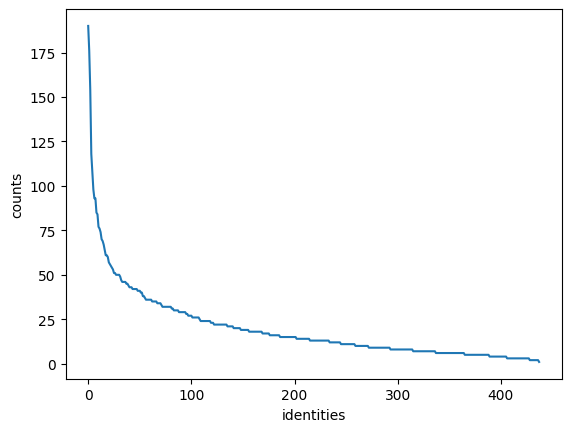

In [ ]:
display_statistics(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   image_id        8729 non-null   int64         
 1   identity        8729 non-null   object        
 2   path            8729 non-null   object        
 3   bbox            8526 non-null   object        
 4   date            8729 non-null   datetime64[ns]
 5   orientation     8526 non-null   object        
 6   segmentation    8526 non-null   object        
 7   original_split  8729 non-null   object        
 8   year            8729 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 579.8+ KB


In [ ]:
df.describe()

,image_id,date,year
count,8729.000000,8729,8729.000000
mean,4365.000000,2017-12-12 10:19:37.042043904,2017.438996
min,1.000000,2010-07-02 00:00:00,2010.000000
25%,2183.000000,2016-06-23 00:00:00,2016.000000
50%,4365.000000,2017-07-20 00:00:00,2017.000000
75%,6547.000000,2020-06-23 00:00:00,2020.000000
max,8729.000000,2022-07-09 00:00:00,2022.000000
std,2519.989583,NaN,2.711531


In [ ]:
df_filtrado = df[df['identity'] == 't281']
df_filtrado.head(20)

,image_id,identity,path,bbox,date,orientation,segmentation,original_split,year
5286,5287,t281,turtles-data/data/images/t281/DFfVmcVbWg.jpeg,"[751.0, 277.0, 230.0, 185.0]",2021-06-23,left,"{'counts': [1001450, 40, 1291, 42, 1290, 45, 1...",test,2021
5287,5288,t281,turtles-data/data/images/t281/DjtwgIIURL.JPG,"[996.0, 466.0, 434.0, 303.0]",2016-07-11,right,"{'counts': [1328218, 59, 1269, 71, 1260, 75, 1...",train,2016
5288,5289,t281,turtles-data/data/images/t281/DlavQZvuXW.JPG,"[995.0, 671.0, 159.0, 146.0]",2016-07-11,top,"{'counts': [1327065, 12, 1311, 32, 1299, 36, 1...",train,2016
5289,5290,t281,turtles-data/data/images/t281/EnMYsDWsML.jpeg,"[599.0, 510.0, 319.0, 255.0]",2021-06-23,left,"{'counts': [799143, 28, 1289, 57, 1270, 67, 12...",test,2021
5290,5291,t281,turtles-data/data/images/t281/EvzzmcIWDo.JPG,"[1033.0, 327.0, 244.0, 170.0]",2016-06-29,right,"{'counts': [1377408, 2, 1323, 17, 1314, 21, 13...",train,2016
5291,5292,t281,turtles-data/data/images/t281/FVMAXXbTki.jpeg,"[435.0, 317.0, 496.0, 366.0]",2021-06-23,left,"{'counts': [580374, 93, 1231, 106, 1223, 113, ...",test,2021
5292,5293,t281,turtles-data/data/images/t281/HKSHHIxrHU.JPG,"[1029.0, 671.0, 93.0, 98.0]",2016-06-30,right,"{'counts': [1372332, 4, 1328, 7, 1325, 11, 132...",train,2016
5293,5294,t281,turtles-data/data/images/t281/ILXxnZwvNh.JPG,"[770.0, 593.0, 136.0, 146.0]",2016-07-11,topleft,"{'counts': [1027019, 3, 4, 41, 1280, 55, 1277,...",train,2016
5294,5295,t281,turtles-data/data/images/t281/KCYYweQIgv.JPG,"[931.0, 668.0, 202.0, 141.0]",2016-06-29,right,"{'counts': [1241746, 17, 1313, 25, 1306, 28, 1...",train,2016
5295,5296,t281,turtles-data/data/images/t281/LexiSVlHdE.JPG,"[643.0, 581.0, 157.0, 130.0]",2018-06-23,left,"{'counts': [857756, 15, 1314, 22, 1310, 24, 13...",valid,2018


In [ ]:
valores_unicos_split = df['original_split'].unique()
print(valores_unicos_split)

['test' 'train' 'valid']


In [ ]:
print(len(df[df['original_split'] == 'test']))
print(len(df[df['original_split'] == 'train']))
print(len(df[df['original_split'] == 'valid']))

2632
4679
1418


In [ ]:
valores_unicos = df['orientation'].unique()
print(valores_unicos)

['left' 'right' 'topright' 'top' 'topleft' nan 'below' 'front']


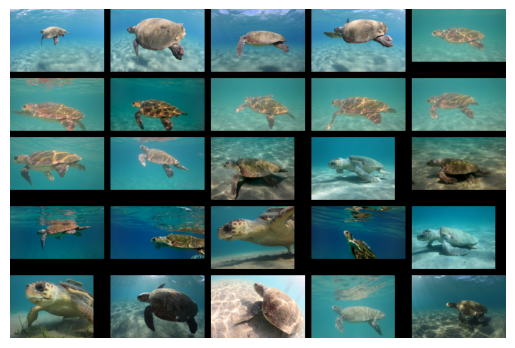

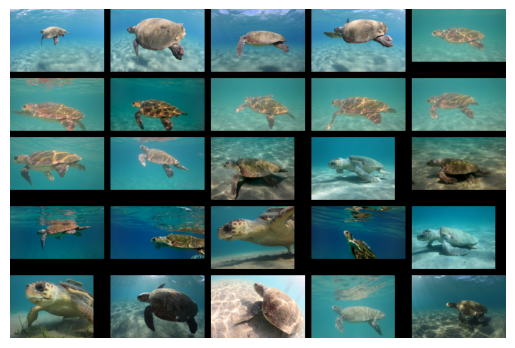

In [ ]:
dataset.plot_grid(n_cols=5, idx=df['orientation']=='left')

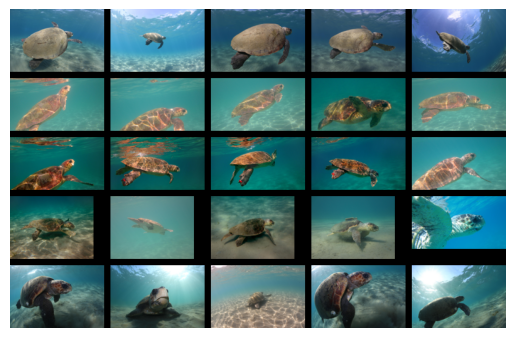

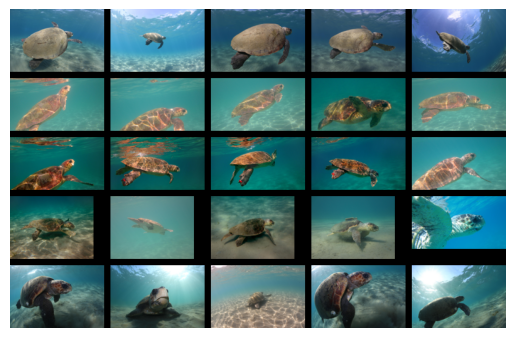

In [ ]:
dataset.plot_grid(n_cols=5, idx=df['orientation']=='right')

In [ ]:
metadata = SeaTurtleID2022('data/SeaTurtleID2022')
image_root = 'data/SeaTurtleID2022'

In [ ]:
transform = T.Compose([
    T.Resize([224, 224]),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

dataset_database = WildlifeDataset(
    metadata = metadata.df[df['original_split'] == 'train'],
    root = image_root,
    transform=transform
)

dataset_query = WildlifeDataset(
    metadata = metadata.df[df['original_split'] == 'test'],
    root = image_root,
    transform=transform
)

In [ ]:
backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)
extractor = DeepFeatures(backbone)
query, database = extractor(dataset_query), extractor(dataset_database)

print(f'Query features shape: {query.shape}, Database features shape: {database.shape}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/204M [00:00<?, ?B/s]

100%|███████████████████████████████████████████████████████████████| 37/37 [31:35<00:00, 51.24s/it]

Query features shape: (2632, 768), Database features shape: (4679, 768)


In [ ]:
similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)

In [ ]:
classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
predictions = classifier(similarity['cosine'])
accuracy = np.mean(dataset_query.labels_string == predictions) # Use dataset_query.labels_string instead of dataset_database.labels_string

/usr/local/lib/python3.10/dist-packages/wildlife_tools/inference/classifier.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


In [ ]:

print("Similarity matrix: \n", similarity['cosine'])
print("Predictions: \n", predictions)
print("Accuracy: \n", accuracy)

Similarity matrix: 
 [[0.28576723 0.44560653 0.13753343 ... 0.47982472 0.3324252  0.35894835]
 [0.18930191 0.27811244 0.16214532 ... 0.3396908  0.20636669 0.24433506]
 [0.09566709 0.20854492 0.11546735 ... 0.35744625 0.18047339 0.21159464]
 ...
 [0.21913217 0.19294341 0.12946855 ... 0.30109224 0.61926293 0.5732865 ]
 [0.13120891 0.1995863  0.07379558 ... 0.50127244 0.5390136  0.52568275]
 [0.12412832 0.19123381 0.08305198 ... 0.5542681  0.50007826 0.48853332]]
Predictions: 
 ['t238' 't242' 't102' ... 't312' 't003' 't058']
Accuracy: 
 0.03875379939209726


In [ ]:
preds = classifier(similarity)
print("Prediction \t", preds)
print("Ground truth \t", dataset_query.labels_string)

TypeError: must be real number, not dict

In [ ]:
acc = sum(preds == dataset_query.labels_string) / len(dataset_query.labels_string)
print('\n Accuracy: ', acc)

NameError: name 'preds' is not defined